# Approximate Dynamic Programming Exercises

- Class: EECE 571U
- Author: Bill Tubbs

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Background - Probability distributions

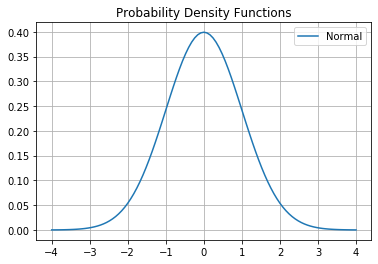

In [2]:
x = np.linspace(-4,4,101)
plt.plot(x, norm.pdf(x), label='Normal')
plt.title("Probability Density Functions")
plt.legend()
plt.grid()
plt.show()

In [3]:
# Random sample (random variates)
norm.rvs()

1.250384414790634

In [4]:
# Cumulative probability density function
norm.cdf(0)

0.5

## Exercise 8.3

Formulate a 1-dimensional LQG problem. Approximate its solution using the procedure above. Implement your solution in Matlab. What choices do you have to make to implement your algorithm? Evaluate your approximation quality based on these choices.

In [5]:
def next_state(x, u, w):
    """Next state given x, u, w.
    """
    return x + u - w

def next_state_sample(x, u, w, size=None):
    return next_state(x, u, w.rvs(size=size))

def next_state_expected(x, u, w):
    """Expected value of next state given x, u.
    """
    return next_state(x, u, w.mean())

def next_state_probability(x, u, dx_dash):
    """Probability of next state being in discrete state
    dx_dash given x, u."""
    return expected_next_state(x, u, 0)

def cost_function(x, u, w, c, r, cost_to_go=0):
    """Cost function in state x given u, w and cost_to_go.
    """
    return cost_to_go + x**2 + c*u - r*w

In [6]:
# Choose system parameters
c = 1
r = 0.1
w = norm()

In [7]:
# Sample the next state (random)
x = 0
u = 1
next_state_sample(x, u, w)

1.5432029273818617

In [8]:
# Expected value of next state
next_state_expected(x, u, w)

1.0

In [9]:
w.cdf(0)

0.5

In [10]:
# Simulation setup

# Number of timesteps
N = 10

In [12]:
# Define discretized state and action spaces
x_bounds = [-1, 1]
n_states = 21
states = np.linspace(x_bounds[0], x_bounds[1], n_states)

action_bounds = [-1, 1]
n_actions = 21
actions = np.linspace(action_bounds[0], action_bounds[1], n_states)

In [13]:
# Calculate terminal state values
x_terminal = 0
terminal_state_values = {x: x**2 for x in states}

In [14]:
# Create discretized value function
state_value_function = {round(x, 1): None for x in states}

In [15]:
# Compute all state values recursively
for t in range(N-1, -1, -1):
    print(t)

9
8
7
6
5
4
3
2
1
0
